In [1]:
#  EDA and Analysis Notebook for Aave ML Credit Scoring


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:

features_path = '../output/features.csv'
labels_path = '../output/labeled_features.csv'
scores_path = '../output/wallet_scores_ml.csv'

df_features = pd.read_csv(features_path)
df_labels = pd.read_csv(labels_path) if labels_path else None
df_scores = pd.read_csv(scores_path)

print("Features shape:", df_features.shape)
print("Scores shape:", df_scores.shape)
df_features.head()




Features shape: (3497, 14)
Scores shape: (3497, 2)


,wallet,deposit_count,borrow_count,repay_count,redeem_count,liquidation_count,total_deposit_usd,total_borrow_usd,total_repay_usd,repay_borrow_ratio,liquidation_borrow_ratio,assets_used,active_days,avg_tx_interval_days
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,0,0,0,0,1.987664e+03,0.000000e+00,0.000000,0.000000e+00,0.0,1,1.000000,1.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,0,0,0,0,2.856945e+14,0.000000e+00,0.000000,0.000000e+00,0.0,1,1.000000,1.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,0,0,0,0,5.152311e+09,0.000000e+00,0.000000,0.000000e+00,0.0,1,7.574132,3.787066
3,0x0000000000e189dd664b9ab08a33c4839953852c,0,0,0,17,0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,4,129.327766,7.607516
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,250,15,4,130,0,2.065773e+17,6.029762e+16,70150.263791,1.163400e-12,0.0,6,132.865903,0.332997


In [3]:

print("Sample of Features:")
display(df_features.sample(5))
print("\nMissing values:")
print(df_features.isnull().sum())
print("\nDistribution of features (descriptive stats):")
display(df_features.describe().T)



Sample of Features:


,wallet,deposit_count,borrow_count,repay_count,redeem_count,liquidation_count,total_deposit_usd,total_borrow_usd,total_repay_usd,repay_borrow_ratio,liquidation_borrow_ratio,assets_used,active_days,avg_tx_interval_days
3139,0x057abc564ba0e32611387cc3964d2c465c2018db,1,0,0,1,0,1.000632e+02,0.000000e+00,0.000000e+00,0.000000,0.0,2,44.309306,22.154653
658,0x010cb104dc1ce1cf2010ee993c74aa347271a686,1,0,0,0,0,9.795385e-05,0.000000e+00,0.000000e+00,0.000000,0.0,1,1.000000,1.000000
601,0x00ee45c909dee53b4cf6af3a5fc3739cd2f9f2a3,10,5,0,1,0,1.785447e+16,1.208278e+16,0.000000e+00,0.000000,0.0,5,20.234572,1.264661
463,0x00b43a92d45ccdfeef6ea98d56f775586fe9e39e,56,23,31,79,0,1.466889e+16,8.527378e+14,8.653621e+14,1.014804,0.0,7,126.400822,0.668787
3335,0x05cfa2830540f19d57fd16b3ad6d5a18cad878d8,1,0,0,0,0,1.452900e+11,0.000000e+00,0.000000e+00,0.000000,0.0,1,1.000000,1.000000



Missing values:
wallet                      0
deposit_count               0
borrow_count                0
repay_count                 0
redeem_count                0
liquidation_count           0
total_deposit_usd           0
total_borrow_usd            0
total_repay_usd             0
repay_borrow_ratio          0
liquidation_borrow_ratio    0
assets_used                 0
active_days                 0
avg_tx_interval_days        0
dtype: int64

Distribution of features (descriptive stats):


,count,mean,std,min,25%,50%,75%,max
deposit_count,3497.0,1.081155e+01,2.986900e+01,0.000000,1.00000,2.000000e+00,6.000000e+00,5.110000e+02
borrow_count,3497.0,4.885902e+00,1.513357e+01,0.000000,0.00000,0.000000e+00,3.000000e+00,2.000000e+02
repay_count,3497.0,3.589648e+00,1.337477e+01,0.000000,0.00000,0.000000e+00,2.000000e+00,2.910000e+02
redeem_count,3497.0,9.237918e+00,2.425183e+02,0.000000,0.00000,0.000000e+00,3.000000e+00,1.426500e+04
liquidation_count,3497.0,7.091793e-02,6.928889e-01,0.000000,0.00000,0.000000e+00,0.000000e+00,2.600000e+01
total_deposit_usd,3497.0,1.205038e+17,1.706699e+18,0.000000,2001.41361,1.964827e+12,1.910777e+15,6.056302e+19
total_borrow_usd,3497.0,7.110951e+16,1.144582e+18,0.000000,0.00000,0.000000e+00,2.503978e+12,3.505958e+19
total_repay_usd,3497.0,4.959363e+16,9.391498e+17,0.000000,0.00000,0.000000e+00,2.225249e+03,3.502175e+19
repay_borrow_ratio,3497.0,2.609076e-01,4.450376e-01,0.000000,0.00000,0.000000e+00,4.995687e-01,3.409999e+00
liquidation_borrow_ratio,3497.0,1.606376e-02,1.565613e-01,0.000000,0.00000,0.000000e+00,0.000000e+00,4.000000e+00


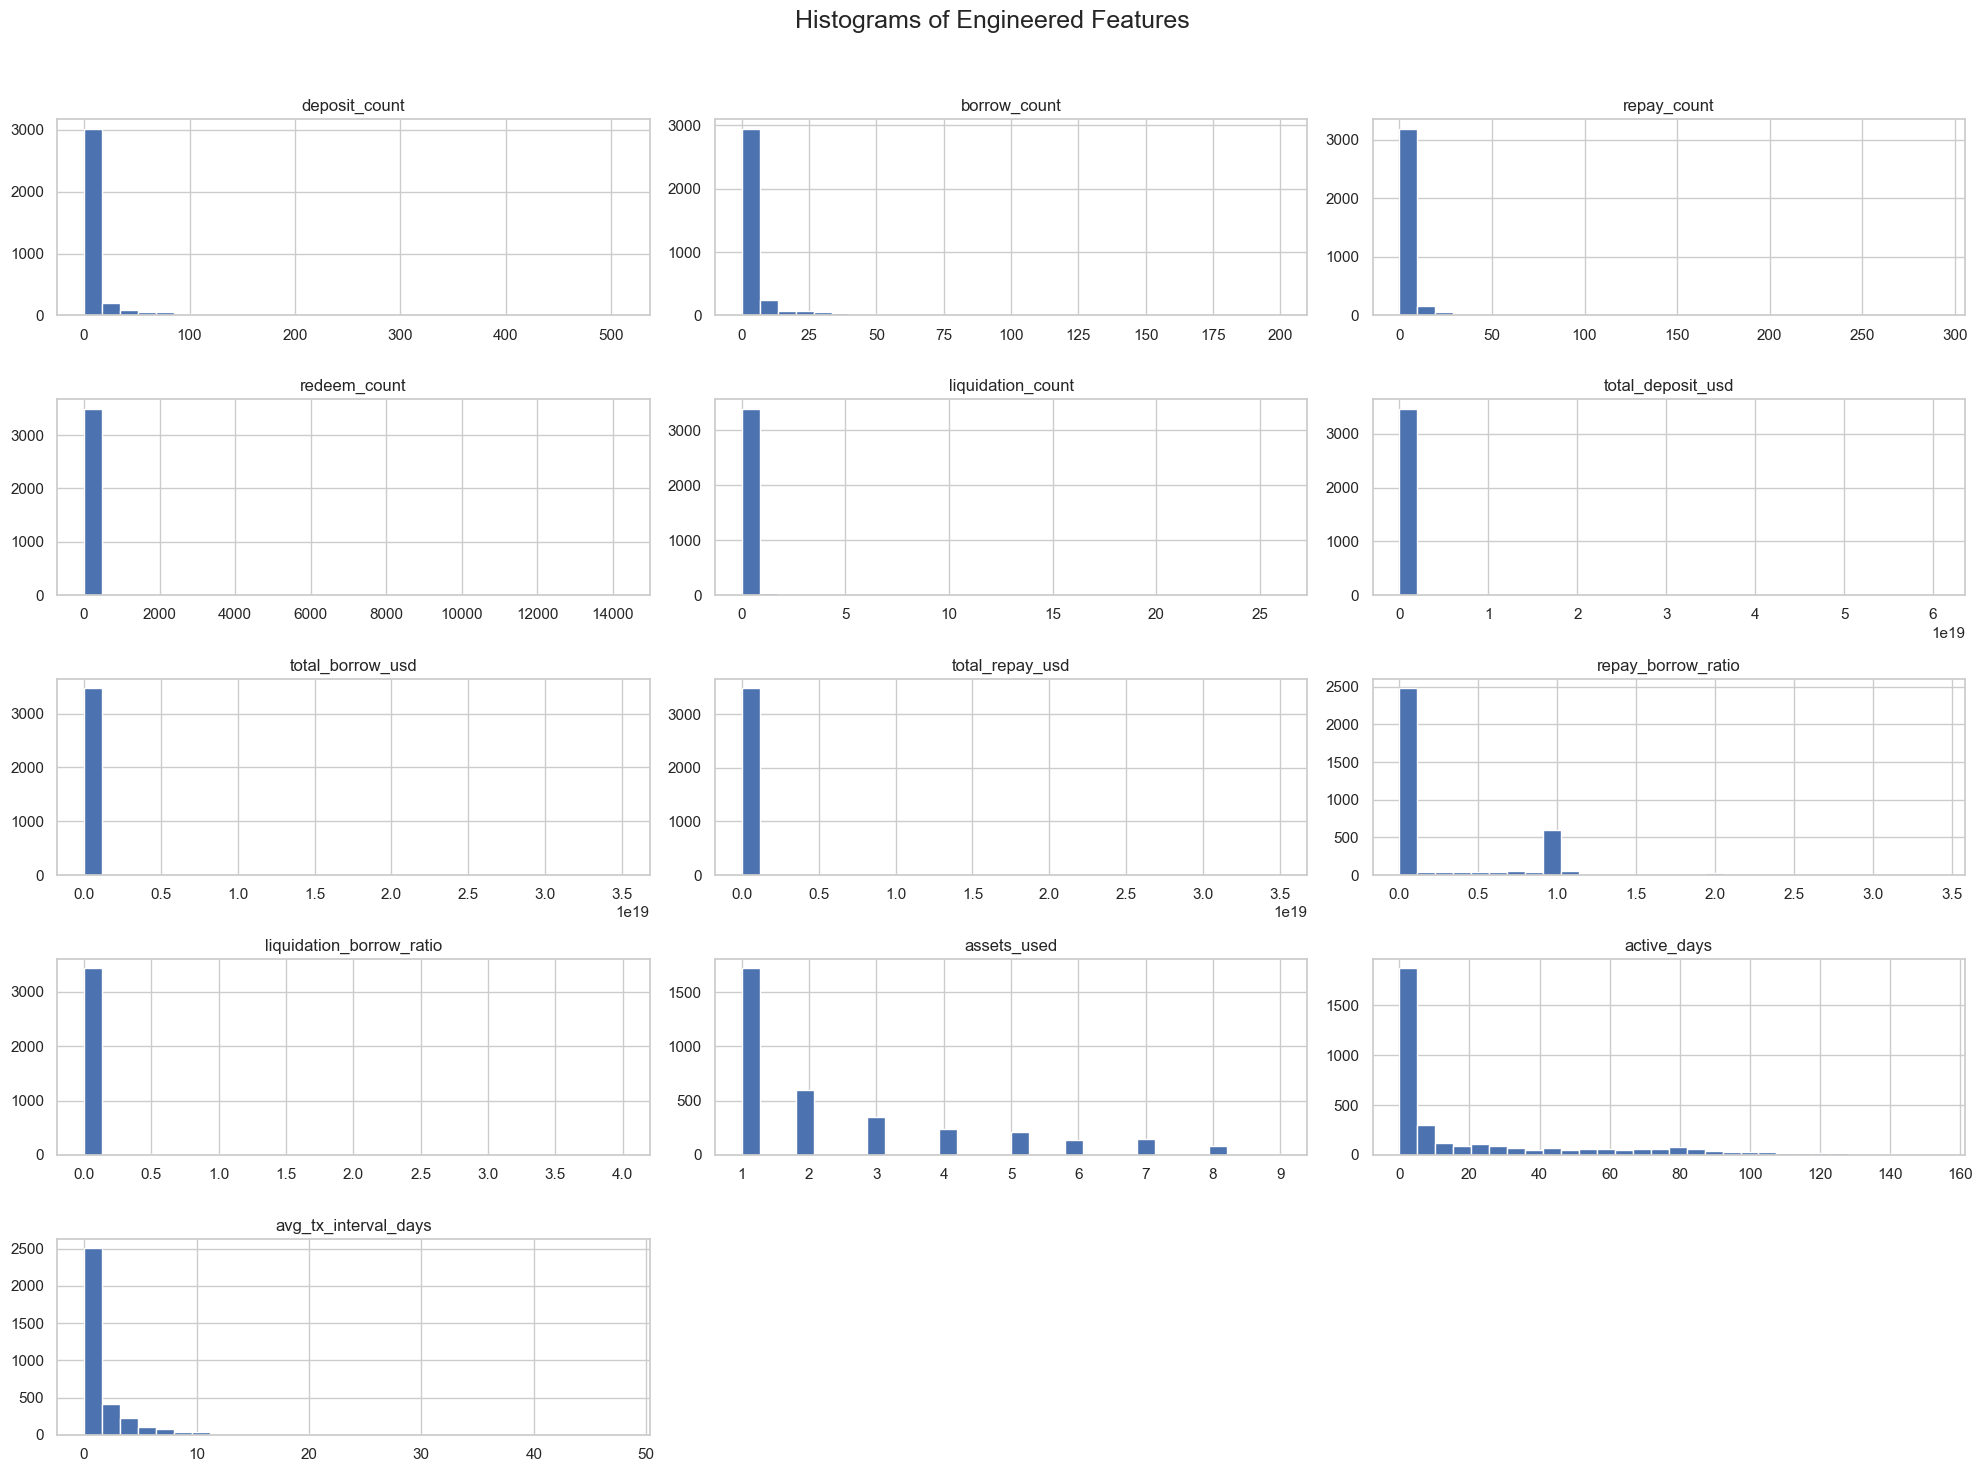

In [4]:

numeric_cols = [
    "deposit_count", "borrow_count", "repay_count", "redeem_count",
    "liquidation_count", "total_deposit_usd", "total_borrow_usd",
    "total_repay_usd", "repay_borrow_ratio", "liquidation_borrow_ratio",
    "assets_used", "active_days", "avg_tx_interval_days"
]

df_features[numeric_cols].hist(bins=30, figsize=(20, 15), layout=(5, 3))
plt.suptitle('Histograms of Engineered Features', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



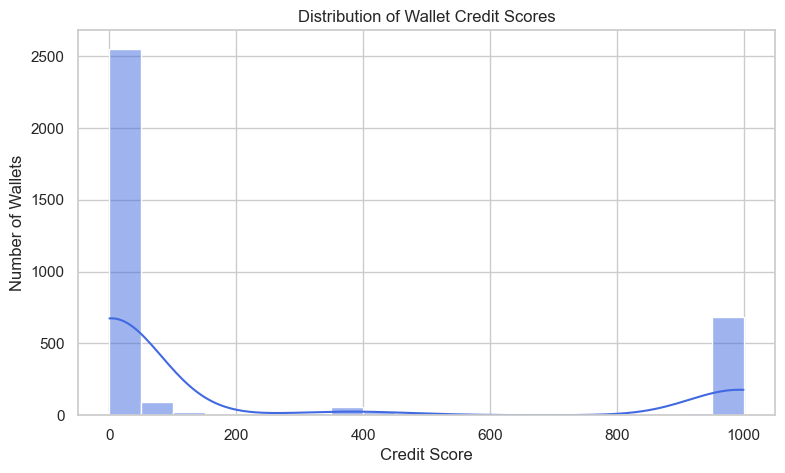

In [5]:
#  Credit Score Distribution
plt.figure(figsize=(9,5))
sns.histplot(df_scores['credit_score'], bins=20, kde=True, color='royalblue')
plt.title('Distribution of Wallet Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Wallets')
plt.show()



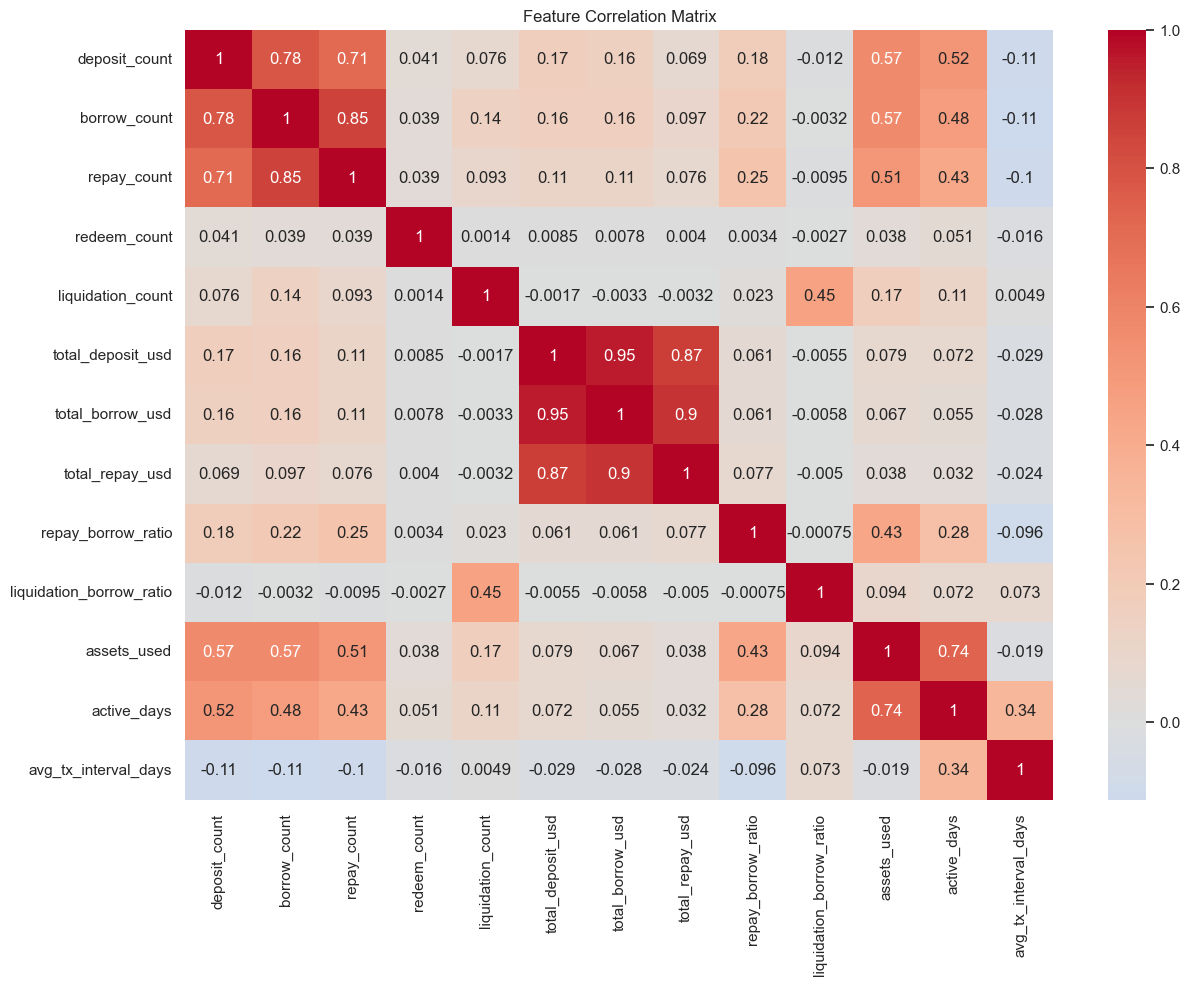

In [6]:
# Correlation Matrix
plt.figure(figsize=(14,10))
sns.heatmap(df_features[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()



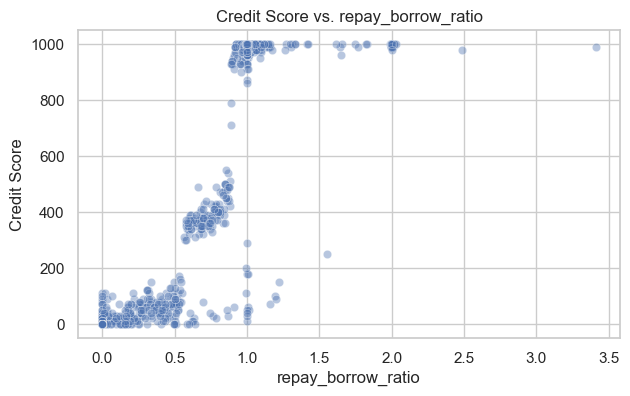

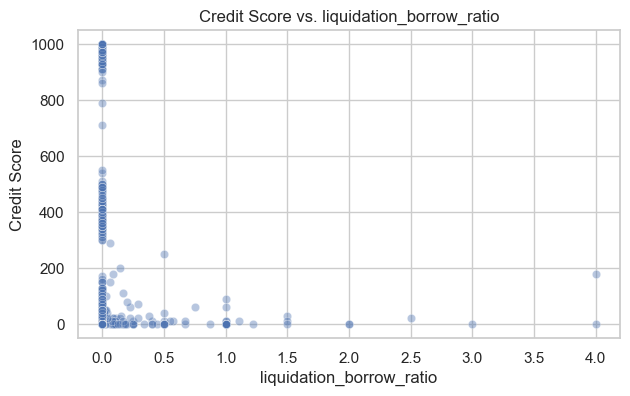

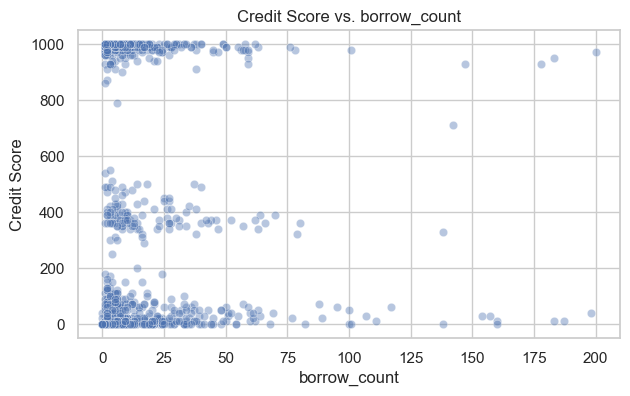

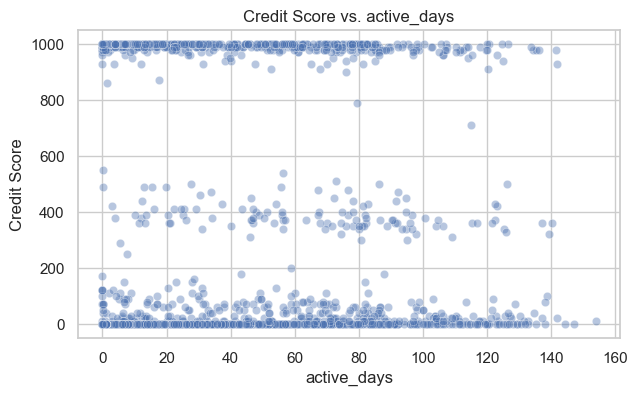

In [7]:
# Feature vs. Score Scatterplots
merged = pd.merge(df_features, df_scores, on='wallet', how='inner')

for feature in ["repay_borrow_ratio", "liquidation_borrow_ratio", "borrow_count", "active_days"]:
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=merged, x=feature, y='credit_score', alpha=0.4)
    plt.title(f'Credit Score vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Credit Score')
    plt.show()

